<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/ScikitOptimize/ScikitOptimize_GaussianProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Scikit Opt Guassian Process - Optimizes the hyperparamers from the distribution of hyperparameter combinations based on the metric choosen.
- The guassian proces identify the local minima based on the number of iterations specified in the process

- Steps

1. define the model
2. define parameter space
3. define objective function
4. run the search with dummy_minimize class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()
data = dataset.data
columns = dataset.feature_names
df = pd.DataFrame(data = data, columns = columns)
df['target'] = dataset.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
X = df.drop('target', axis =1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

Define the model object

In [7]:
from xgboost import XGBClassifier

In [8]:
# non-skleran model object
xgb = XGBClassifier(random_state = 100)

Parameter list --

max_depth: int = 3, learning_rate: float = 0.1, n_estimators: int = 100, verbosity: int = 1, silent: Any | None = None, objective: str = "binary:logistic", booster: str = 'gbtree', n_jobs: int = 1, nthread: Any | None = None, gamma: int = 0, min_child_weight: int = 1, max_delta_step: int = 0, subsample: int = 1, colsample_bytree: int = 1, colsample_bylevel: int = 1, colsample_bynode: int = 1, reg_alpha: int = 0, reg_lambda: int = 1, scale_pos_weight: int = 1, base_score: float = 0.5, random_state: int = 0, seed: Any | None = None, missing: Any | None = None, **kwargs: Any) -> None
Implementation of the scikit-learn API for XGBoost classification.

Define the parameter space

In [9]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.3 MB/s 


In [10]:
from skopt.space import Integer,Real,Categorical

In [11]:
params_grid = [Integer(low = 10, high = 120, prior = 'uniform', name = 'n_estimators'),
          Integer(low = 1, high = 8, prior = 'uniform', name = 'max_depth'),
          Real(low = 0.001, high = 0.1, prior = 'log-uniform', name = 'learning_rate'),
          Real(low = 0.001, high = 0.999, prior = 'log-uniform', name = 'min_samples_splits'),
          Categorical(['exponential','deviance'], name = 'loss')]

create the objective function

In [12]:
from skopt.utils import use_named_args

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
@use_named_args(params_grid)
def objective(**params):

  xgb.set_params(**params)

  scores = cross_val_score(estimator = xgb,
                           X = X_train,
                           y = y_train,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
  
  mean_score = np.mean(scores)
  return -mean_score

Run the search using the dummy_minimize

In [16]:
# class for the guassian process
from skopt import gp_minimize

In [17]:
gp_ = gp_minimize(func = objective,
                  dimensions = params_grid,
                  n_calls = 50,
                  n_initial_points = 5,
                  acq_func = 'EI',
                  verbose = 1,
                  random_state = 100)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.9750
Function value obtained: -0.9471
Current minimum: -0.9471
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1206
Function value obtained: -0.9297
Current minimum: -0.9471
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4141
Function value obtained: -0.9497
Current minimum: -0.9497
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3086
Function value obtained: -0.9246
Current minimum: -0.9497
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.7121
Function value obtained: -0.9597
Current minimum: -0.9597
Iteration No: 6 started. 

Explore the search results

In [18]:
# accuracy
gp_.fun

-0.9647468354430379

In [19]:
# best parameters
gp_.x

[117, 5, 0.09970685814209147, 0.16308873455452608, 'deviance']

In [20]:
hyper_parameters = ['n_estimators','max_depth','learning_rate','min_samples_split','loss']

In [21]:
# hyperparameter combinations
gp_.x_iters

[[84, 4, 0.011291845699197304, 0.002790936462956933, 'deviance'],
 [31, 2, 0.008044143431784013, 0.40742701240106943, 'deviance'],
 [79, 5, 0.01332270861350273, 0.0010409959663509579, 'deviance'],
 [115, 2, 0.001438718226215246, 0.008588634395496206, 'exponential'],
 [87, 5, 0.06919067352488607, 0.007879509735508678, 'exponential'],
 [83, 8, 0.1, 0.1881837214906911, 'exponential'],
 [120, 8, 0.1, 0.001, 'deviance'],
 [10, 2, 0.1, 0.001, 'deviance'],
 [114, 8, 0.001, 0.0030323734696283355, 'deviance'],
 [117, 6, 0.09673132224070567, 0.1585312133731427, 'exponential'],
 [120, 1, 0.1, 0.001, 'deviance'],
 [120, 1, 0.034892818430218915, 0.2544071397656853, 'deviance'],
 [89, 2, 0.09833523410638079, 0.0014466128759298396, 'deviance'],
 [10, 2, 0.1, 0.001, 'exponential'],
 [104, 8, 0.030019917948000758, 0.001, 'exponential'],
 [32, 8, 0.09931988653028045, 0.0011504354262370509, 'exponential'],
 [17, 8, 0.0011632619460824442, 0.002288721253994334, 'deviance'],
 [120, 8, 0.02446805125623416, 0

In [22]:
# accuracy (metric) in each iterations
gp_.func_vals

array([-0.94712025, -0.9296519 , -0.9496519 , -0.92462025, -0.95974684,
       -0.95721519, -0.95971519, -0.93962025, -0.93712025, -0.95718354,
       -0.96224684, -0.94971519, -0.9521519 , -0.93962025, -0.95471519,
       -0.94968354, -0.93212025, -0.95218354, -0.95718354, -0.95218354,
       -0.9496519 , -0.95727848, -0.93712025, -0.95218354, -0.93462025,
       -0.9421519 , -0.95971519, -0.95721519, -0.95968354, -0.9496519 ,
       -0.95721519, -0.89449367, -0.9396519 , -0.93212025, -0.95974684,
       -0.96474684, -0.95718354, -0.9471519 , -0.95471519, -0.93208861,
       -0.93962025, -0.95718354, -0.95971519, -0.93212025, -0.96221519,
       -0.96471519, -0.95968354, -0.96471519, -0.95718354, -0.96224684])

In [23]:
hyper_combo = pd.DataFrame(gp_.x_iters)
metric = pd.DataFrame(abs(gp_.func_vals))
tmp = pd.concat([hyper_combo,metric], axis = 1)
tmp.columns = hyper_parameters + ['metric']
tmp.sort_values(by = 'metric', ascending = False, inplace = True)
tmp.head()

,n_estimators,max_depth,learning_rate,min_samples_split,loss,metric
35,117,5,0.099707,0.163089,deviance,0.964747
47,120,4,0.092822,0.143112,deviance,0.964715
45,119,4,0.099043,0.043432,deviance,0.964715
10,120,1,0.100000,0.001000,deviance,0.962247
49,119,4,0.097454,0.369572,exponential,0.962247


In [24]:
best_params = tmp.drop('metric', axis = 1).iloc[0,:].to_dict()
best_params

{'n_estimators': 117,
 'max_depth': 5,
 'learning_rate': 0.09970685814209147,
 'min_samples_split': 0.16308873455452608,
 'loss': 'deviance'}

Lets Explor the convergence, evalations plots

In [27]:
from skopt.plots import plot_convergence,plot_evaluations,plot_objective

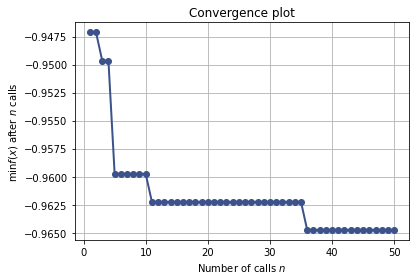

In [26]:
plot_convergence(gp_)
plt.show()

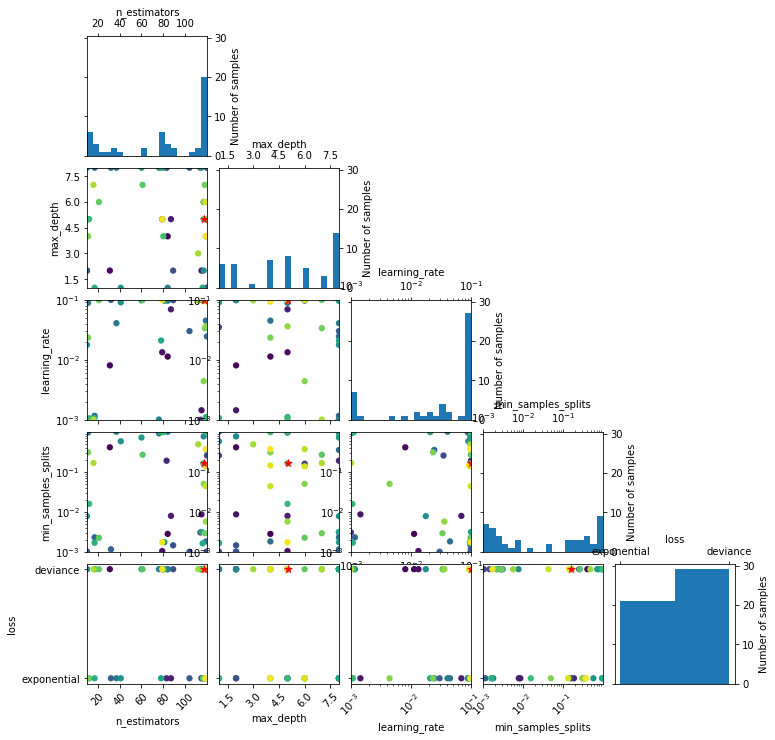

In [28]:
plot_evaluations(gp_)
plt.show()

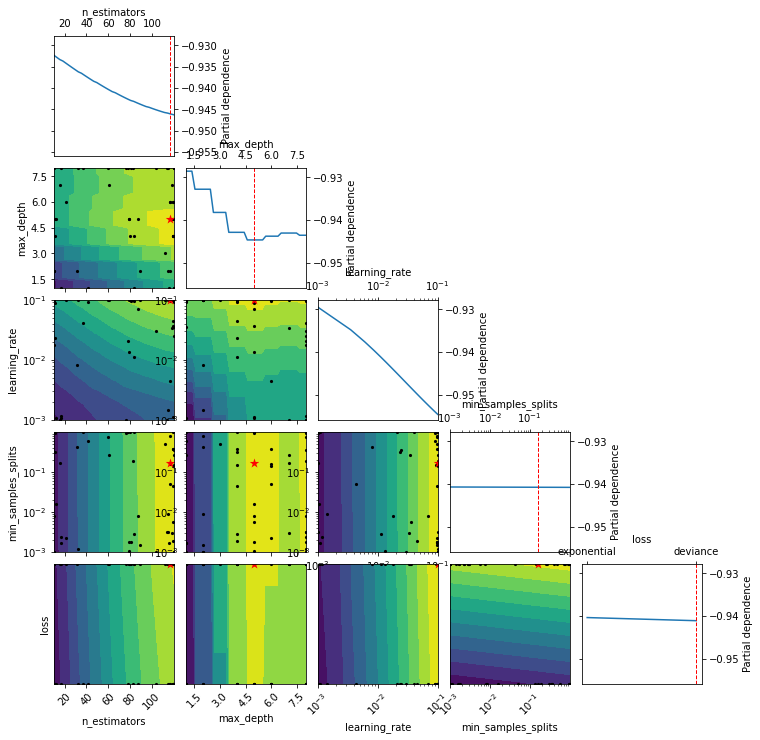

In [30]:
plot_objective(gp_)
plt.show()

Generate the final model

In [31]:
model = XGBClassifier(n_estimators = best_params['n_estimators'],
                      max_depth = best_params['max_depth'],
                      min_samples_split = best_params['min_samples_split'],
                      learning_rate = best_params['learning_rate'],
                      loss = best_params['loss'])

In [32]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(learning_rate=0.09970685814209147, loss='deviance', max_depth=5,
              min_samples_split=0.16308873455452608, n_estimators=117)>

In [33]:
model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.09970685814209147, loss='deviance', max_depth=5,
              min_samples_split=0.16308873455452608, n_estimators=117)

Evaluate the final model

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print('train accuracy : ',accuracy_score(y_train,model.predict(X_train)))
print('test accuracy : ',accuracy_score(y_test,model.predict(X_test)))

train accuracy :  1.0
test accuracy :  0.9824561403508771
